Ting Pan, github ID: [tingpan](https://github.com/tingpan)

# Week 1 Blog

## Apply Shogun Framework to Basketball Data Analyzation

During the first week of this project I mainly focused on preparing basketball data and implementing clustering algorithms on them. 

First couple of days I mainly works on getting data from [stats.nba.com](http://stats.nba.com/). Although there are plenty of data that could be used, to simplify process, I only processed datasets that will be used in this project. The idea of which dataset is useful in clustering players was inspired by my previous project [project](http://dota666.com/basketball/). In that project, I found that play type stats would be best one for clustering players([full description about this](https://github.com/tingpan/shogun-data#play-type-statsmost-important-stats-in-this-project)). I processed dataset that contains play type stats of players in NBA 2015-16 regular seanson and generated a CSV file as `play_freq.data`.

After that I wrote a notebook of how to clustering NBA players using play type stats, shogun and its K-means algorithm API. I used an `load_data()` method to load CSV data into numpy array and also stored players' information(name) in memory.

In [1]:
from numpy import array

def load_data():
    f = open('./play_freq.data')
    features = []
    names = []
    for line in f:
        words = line.rstrip().split(',')
        # Store player names
        names.append(words[0])
        # Store features of each player
        features.append([float(i) for i in words[1:]])

    f.close()
    # Return numpy array data and player names
    return (array(features).T, names)

data, names = load_data()

Besides, `train_kmeans(k, data)` is created for actual clustering.

In [2]:
from modshogun import *

def train_kmeans(k, data):
    train_features = RealFeatures(data)
    
    # calculate euclidean distance of features
    distance = EuclideanDistance(train_features, train_features)

    # initialize KMeans object
    kmeans = KMeans(k, distance, True)

    # training kmeans
    kmeans.train(train_features)

    # labels for data points
    result = kmeans.apply()
    centers = kmeans.get_cluster_centers()
    radiuses = kmeans.get_radiuses()
    
    return result, centers, radiuses

As I have no idea what is the optimal value of k, I used Elbow Method to find out it. I ran K-means clustering on the dataset for a range of values of k and calculate the sum oof f squared errors for each k. The best k would be the k with a small loss, and the trend of loss decreasing is diminishing. Here is the implemetation and figure of loss:

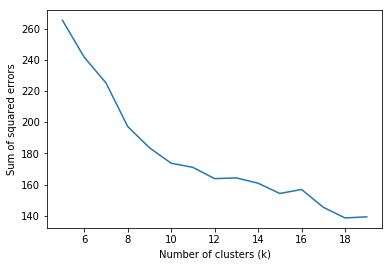

In [11]:
# Calculate loss
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

ys = []
xs = []
player_count = len(data[0])
iter_count = 10
for k in range(5, 20):
        xs.append(k)
        _ys = []
        for i in range(0, iter_count):
            result, centers, radiuses = train_kmeans(k, data)
            for player_i in range(0, player_count):
                cluster_i = int(result[player_i])
                center = array([x[cluster_i] for x in centers])
                player = array([y[player_i] for y in data])
                _ys.append(np.sum((center - player)**2))
        ys.append(sum(_ys)/iter_count/player_count)

# Draw loss

plt.plot(xs,ys)
plt.xlabel('Number of clusters (k)')
plt.ylabel('Sum of squared errors')
plt.show()

However, as this is a real world dataset, not only loss but also real world cases are considered to determined k. By 
validing k with checking if every players in cluster are similar enough, I got 13 types of players and created methods for showing characteristics of each type and their players list.

In [12]:
def show_players(names, result, index):
    players = []
    for i, name in enumerate(names):
            if int(result[i]) == index:
                players.append(name)
    print players

def draw_values(k, centers, index):
    ind = np.arange(10)
    width = 0.5
    headers = ['Transition', 'Isolation', 'PRBallHandler', 'PRRollman', 'Postup', 'Spotup', 'Handoff', 'Cut', 'OffScreen', 'OffRebound']
    fig, ax = plt.subplots()
    rects = plt.bar(ind, [values[index] for values in centers], width, color=[(min(x/10.0, 1), x/20.0, 0.55) for x in range(1,21,2)])
    ax.set_ylabel('Freq Rating')
    ax.set_title('Player Cluster')
    ax.set_xticks(ind)
    ax.legend(rects, headers)
    plt.show()

Below are some clusters and their player lists.

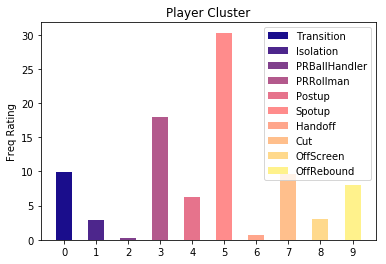

['Chris Bosh', 'Kristaps Porzingis', 'Serge Ibaka', 'Mirza Teletovic', 'Nikola Mirotic', 'Marvin Williams', 'Ersan Ilyasova', 'Kelly Olynyk', 'Luis Scola', 'Terrence Jones', 'Meyers Leonard', 'Darrell Arthur', 'Jon Leuer', 'Jason Smith', 'Frank Kaminsky', 'Marreese Speights', 'Patrick Patterson', 'Andrea Bargnani', 'Paul Pierce', 'Kris Humphries', 'Trey Lyles', 'Spencer Hawes', 'Charlie Villanueva', 'Mike Scott', 'Channing Frye', 'Larry Nance Jr.', 'Chris McCullough', 'Ryan Kelly', 'Nemanja Bjelica', 'Jonas Jerebko', 'Quincy Acy', 'Noah Vonleh', 'Josh McRoberts', 'Drew Gooden', "Johnny O'Bryant", 'Kevin Garnett', 'Luc Mbah a Moute', 'Jason Thompson']


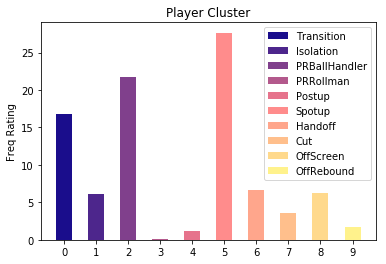

['Gordon Hayward', 'Kentavious Caldwell-Pope', 'Eric Gordon', 'Will Barton', 'Evan Fournier', 'Chandler Parsons', 'Kent Bazemore', 'Isaiah Canaan', 'Dion Waiters', 'Marcus Thornton', 'Marcus Smart', 'Jerryd Bayless', 'Patrick Beverley', 'Stanley Johnson', 'Gary Neal', 'O.J. Mayo', 'Patty Mills', 'Manu Ginobili', 'Wayne Ellington', 'Gerald Henderson', 'Langston Galloway', 'Nick Young', 'Lance Stephenson', "E'Twaun Moore", 'Randy Foye', 'Devin Harris', 'Vince Carter', 'Mario Hezonja', 'Tony Snell', 'Josh Richardson', 'Markel Brown', 'Seth Curry', 'Ronnie Price', 'Jonathon Simmons', 'CJ Watson', 'Kirk Hinrich', 'Sonny Weems', 'Sergey Karasev']


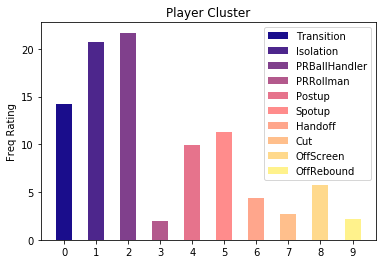

['James Harden', 'Kevin Durant', 'LeBron James', 'Carmelo Anthony', 'Kobe Bryant', 'Jamal Crawford']


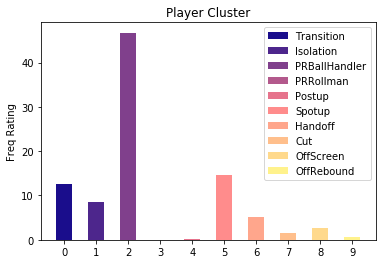

['Damian Lillard', 'Brandon Knight', 'Kyrie Irving', 'Kemba Walker', 'Derrick Rose', 'Reggie Jackson', 'Chris Paul', 'Jrue Holiday', 'Emmanuel Mudiay', 'Tyreke Evans', 'Ish Smith', 'Mike Conley', 'Jarrett Jack', 'Norris Cole', 'Lou Williams', 'Tony Parker', 'Dennis Schroder', 'Jose Juan Barea', 'Raymond Felton', 'Jameer Nelson', 'Mo Williams', 'Cory Joseph', 'Matthew Dellavedova', 'Shane Larkin', 'TJ McConnell', 'Cameron Payne', 'Tim Frazier', 'Marcelo Huertas', 'Pablo Prigioni']


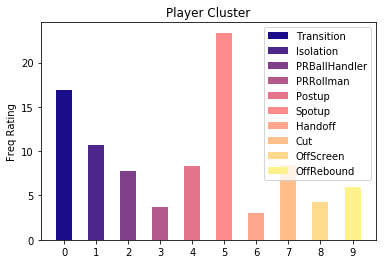

['Kawhi Leonard', 'Rudy Gay', 'Danilo Gallinari', 'Giannis Antetokounmpo', 'Marcus Morris', 'Jabari Parker', 'Tobias Harris', 'Arron Afflalo', 'Julius Randle', 'Jeff Green', 'Michael Beasley', 'Draymond Green', 'Harrison Barnes', 'TJ Warren', 'Shabazz Muhammad', 'Jerami Grant', 'Kevin Martin', 'Tony Allen', 'PJ Tucker', 'Derrick Williams', 'Josh Smith', 'Andre Iguodala', 'Maurice Harkless', 'Metta World Peace', 'Shaun Livingston', 'Rondae Hollis-Jefferson', 'James Johnson', 'Kyle Anderson', 'Solomon Hill']


In [15]:

k = 13
result, centers, radiuses = train_kmeans(k, data)
for i in range(0,5):
    draw_values(k, centers, i)
    show_players(names, result, i)
            

Therefore I have clustered players into 13 different types by their frequency of performing different play types on court. To start the next step of the project would be using this clustering result to predict game results, I have wrote the K-means clustering script(`kmeans.py`) to generating clusters of each players. 

However, play types may not be the best datasets for clustering players and I will do more validation on this after prediction. I will find out the best clustering results for prediction in my future works.